In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

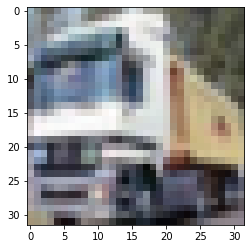

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

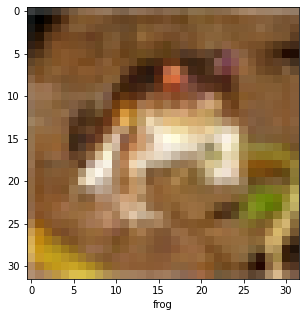

In [ ]:
plot_sample(X_train, y_train, 0)

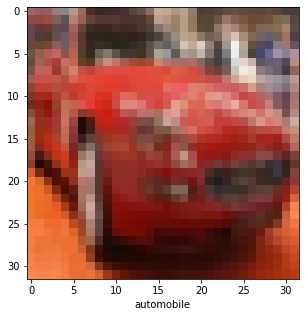

In [ ]:
plot_sample(X_train, y_train, 5)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Using ANN 

ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')    
                        ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.8557 - accuracy: 0.3345
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6576 - accuracy: 0.4124
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5717 - accuracy: 0.4455
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5091 - accuracy: 0.4678
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4592 - accuracy: 0.4830
Epoch 6/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4170 - accuracy: 0.5010
Epoch 7/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3772 - accuracy: 0.5153
Epoch 8/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3384 - accuracy: 0.5315
Epoch 9/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3117 - accuracy: 0.5385
Epoch 10/10
1563/1563 [==============================] - 98s 63

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1000
           1       0.75      0.49      0.59      1000
           2       0.41      0.40      0.41      1000
           3       0.43      0.14      0.21      1000
           4       0.40      0.52      0.45      1000
           5       0.42      0.44      0.43      1000
           6       0.44      0.69      0.54      1000
           7       0.69      0.48      0.56      1000
           8       0.49      0.76      0.60      1000
           9       0.59      0.57      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.49     10000
weighted avg       0.52      0.50      0.49     10000



In [ ]:
#Using CNN

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4713 - accuracy: 0.4693
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1120 - accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9945 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.9086 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8543 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7974 - accuracy: 0.7245
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7511 - accuracy: 0.7398
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7095 - accuracy: 0.7529
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6707 - accuracy: 0.7655
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9125 - accuracy: 0.7007


[0.9125378131866455, 0.7006999850273132]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:6]

array([[2.94564670e-04, 2.73324829e-03, 8.71371594e-04, 8.58756125e-01,
        3.67249857e-04, 1.15981422e-01, 1.47890523e-02, 2.12869549e-04,
        4.73789079e-03, 1.25626766e-03],
       [4.34576767e-03, 1.71108216e-01, 3.17928098e-05, 1.93848632e-06,
        7.63699362e-08, 1.22174939e-07, 1.70824978e-06, 4.04519156e-08,
        8.21160018e-01, 3.35023645e-03],
       [1.02781795e-01, 6.99462712e-01, 1.47983143e-02, 3.99502218e-02,
        9.30260215e-03, 3.58108641e-03, 4.96550056e-04, 1.55035239e-02,
        5.43071590e-02, 5.98159768e-02],
       [8.57132614e-01, 5.34764342e-02, 4.92891297e-02, 1.05636078e-03,
        3.51167540e-03, 4.35192924e-05, 7.25876261e-03, 4.17340634e-04,
        2.77746189e-02, 3.95616735e-05],
       [1.98989801e-05, 1.05145591e-04, 6.81656152e-02, 1.00418273e-02,
        1.74751431e-01, 5.31833060e-03, 7.41448760e-01, 4.64810510e-05,
        9.60475445e-05, 6.43978774e-06],
       [3.04063565e-06, 2.49013792e-05, 9.37524543e-04, 8.79406370e-03,
   

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:6]

[3, 8, 1, 0, 6, 6]

In [ ]:
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

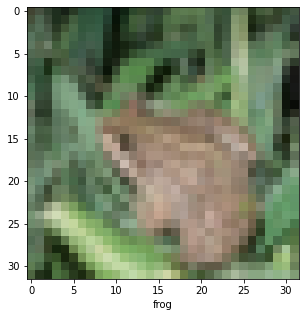

In [ ]:
plot_sample(X_test, y_test, 4)

In [ ]:
classes[y_classes[4]]

'frog'

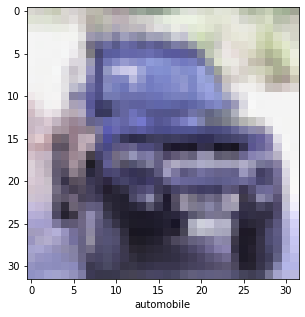

In [ ]:
plot_sample(X_test, y_test, 9)

In [ ]:
classes[y_classes[9]]

'automobile'